In [2]:
import numpy as np
import os
import seaborn as sns
parent_dir= './datas2/'
sub_dir = ['00Sitting','01Waving','02Walking','03Jumping','04Running']
LABEL = {
    0: 'Sitting',
    1: 'Stretching',
    2: 'Walking',
    3: 'Jumping',
    4: 'Running'
}
window_size = 25

# plot data

In [105]:
# plot the velocity vs time
import matplotlib.pyplot as plt
def traverse_plot(folder_path,label):
    datas = np.zeros((0,5))
    for file in os.listdir(folder_path):
        content_path = os.path.join(folder_path, file)
        if os.path.isfile(content_path):
            # print(f'plot graph for file: {content_path}')
            activ_data = get_data(content_path)
            # plot_velocity(activ_data)
            # plot_components(activ_data,label)
            # plot_hist(activ_data,label)
            # plot_coordinate(activ_data)
            datas = np.concatenate((datas,activ_data),axis=0)
            print(f'data shape: {datas.shape}')
            
        else:
            print(f'not file: {content_path}')
    # plot_velocity(datas)
    # plot_components(datas,label)
    # plot_hist(datas,label)
    # plot_coordinate(datas)
    return datas
           
def get_data(file_path):
    data = np.genfromtxt(file_path, delimiter=',', dtype="int", encoding=None)
    print(f'read data {file_path} success')
    t = np.arange(0, len(data) * 0.1, 0.1)
    label = np.array(data[:,0])
    v = np.array(data[:, 3])
    x = np.array(data[:, 1])
    y = np.array(data[:, 2])

    activ_data = np.vstack((label, t, x, y, v)).T
    return activ_data
    
def plot_coordinate(activ_data,size=3000):
    plt.figure(figsize=(10, 6))
    x = activ_data[:, 2]
    y = activ_data[:, 3]
    v = activ_data[:, 4]
    label = LABEL[activ_data[:, 0][0]]
    plt.scatter(x, y, c=v, cmap='viridis', marker='o', label='Position',s=5)
    plt.xlabel('x')
    plt.ylabel('Y')
    plt.colorbar(label='velocity')
    plt.title(label=label)
    plt.grid(True)
    plt.legend()
    plt.show()
def plot_velocity(activ_data):
    fig, ax = plt.subplots(figsize=(15, 4))

    ax.plot(activ_data[:, 1], activ_data[:, 4])
    ax.set_xlabel('t(s)')
    ax.set_ylabel('v(m/s)')
    ax.set_title(LABEL[activ_data[:, 0][0]] + ' velocity vs time', fontsize=16)

    plt.show()
def plot_components(activ_data,label):
    t = activ_data[:, 1]
    x = activ_data[:, 2]
    y = activ_data[:, 3]
    v = activ_data[:, 4]
    vx = np.diff(x)
    vy = np.diff(y)
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 10), sharex=True)

    ax0.plot(t[1:], vx)
    ax0.set_xlabel('t')
    ax0.set_ylabel('vx')
    ax0.set_title(f'{label} x-axis velocity vs time')

    ax1.plot(t[1:], vy)
    ax1.set_xlabel('t')
    ax1.set_ylabel('vy')
    ax1.set_title(f'{label} y-axis velocity vs time')


    ax2.plot(t[1:], v[1:])
    ax2.set_xlabel('t')
    ax2.set_ylabel('v')
    ax2.set_title(f'{label} velocity vs time')

    plt.subplots_adjust(hspace=0.2)
    plt.subplots_adjust(top=0.9)
    plt.show()
def plot_ecdf(activ_data):
    x = activ_data[:, 2]
    y = activ_data[:, 3]
    vx = np.diff(x)
    vy = np.diff(y)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # 在左边绘制 "vx" 的累积分布函数
    sns.ecdfplot(vx, ax=ax1)
    ax1.set_title('ECDF of vx')
    ax1.set_xlabel('vx')
    ax1.set_ylabel('Cumulative Probability')

    # 在右边绘制 "vy" 的累积分布函数
    sns.ecdfplot(vy, ax=ax2)
    ax2.set_title('ECDF of vy')
    ax2.set_xlabel('vy')
    ax2.set_ylabel('Cumulative Probability')

    # 调整布局，防止重叠
    plt.tight_layout()

    # 显示图形
    plt.show()
def plot_hist(activ_data,label):
    x = activ_data[:, 2]
    y = activ_data[:, 3]
    vx = np.diff(x)
    vy = np.diff(y)
    threshold_vx = 155
    threshold_vy = 155

    plt.figure(figsize=(12, 4))

    # 绘制 "vx" 的直方图
    plt.subplot(1, 2, 1)
    plt.hist(vx, bins=200, edgecolor='black')
    plt.axvline(x=threshold_vx, color='red', linestyle='--', label='Threshold')
    plt.axvline(x=-threshold_vx, color='red', linestyle='--', label='Threshold')
    plt.title(f'{label} Histogram of vx')
    plt.xlabel('vx')
    plt.xlim(-300,300)
    plt.ylabel('Frequency')
    plt.legend()
    count_within_threshold = np.sum((np.abs(vx) >= -threshold_vx) & (np.abs(vx) <= threshold_vx))
    count_outside_threshold = len(vx) - count_within_threshold
    print(f"Accuracy: {1-count_outside_threshold/len(vx)}")
    
    plt.subplot(1, 2, 2)
    plt.hist(vy, bins=200, edgecolor='black')
    plt.axvline(x=threshold_vy, color='red', linestyle='--', label='Threshold')
    plt.axvline(x=-threshold_vy, color='red', linestyle='--', label='Threshold')
    plt.title(f'{label} Histogram of vy')
    plt.xlabel('vy')
    plt.xlim(-300,300)
    plt.ylabel('Frequency')
    plt.legend()
    count_within_threshold = np.sum((np.abs(vy) >= -threshold_vy) & (np.abs(vy) <= threshold_vy))

    count_outside_threshold = len(vy) - count_within_threshold

    print(f"Accuracy: {1-count_outside_threshold/len(vy)}")
    plt.tight_layout()

    plt.show()    
    
traverse_plot(parent_dir+sub_dir[3],LABEL[3])    

read data ./datas2/03Jumping\Jumping 2023-12-14 101911.txt success
data shape: (3529, 5)
read data ./datas2/03Jumping\Jumping 2023-12-14 112821.txt success
data shape: (7055, 5)
read data ./datas2/03Jumping\Jumping 2023-12-14 142648.txt success
data shape: (10541, 5)
read data ./datas2/03Jumping\Jumping 2023-12-14 142826.txt success
data shape: (13994, 5)
read data ./datas2/03Jumping\Jumping 2023-12-21 175127.txt success
data shape: (16756, 5)


array([[ 3.000e+00,  0.000e+00, -5.500e+01,  1.315e+03, -8.000e+00],
       [ 3.000e+00,  1.000e-01, -5.400e+01,  1.316e+03, -1.600e+01],
       [ 3.000e+00,  2.000e-01, -5.200e+01,  1.317e+03, -2.400e+01],
       ...,
       [ 3.000e+00,  2.759e+02,  3.110e+02,  1.351e+03, -2.400e+01],
       [ 3.000e+00,  2.760e+02,  3.180e+02,  1.344e+03, -3.200e+01],
       [ 3.000e+00,  2.761e+02,  3.250e+02,  1.337e+03, -3.900e+01]])

read data ./datas2/04Running/Running 2023-12-14 161746.txt success
data shape: (7028, 5)
read data ./datas2/04Running/Running 2023-12-14 195450.txt success
data shape: (13796, 5)
read data ./datas2/04Running/Running 2023-12-21 204539.txt success
data shape: (17191, 5)
Accuracy (vx) - Running: 0.9627108784176847
Accuracy (vy) - Running: 0.999650959860384
Total Accuracy (vx): 0.9627108784176847
Total Accuracy (vy): 0.999650959860384


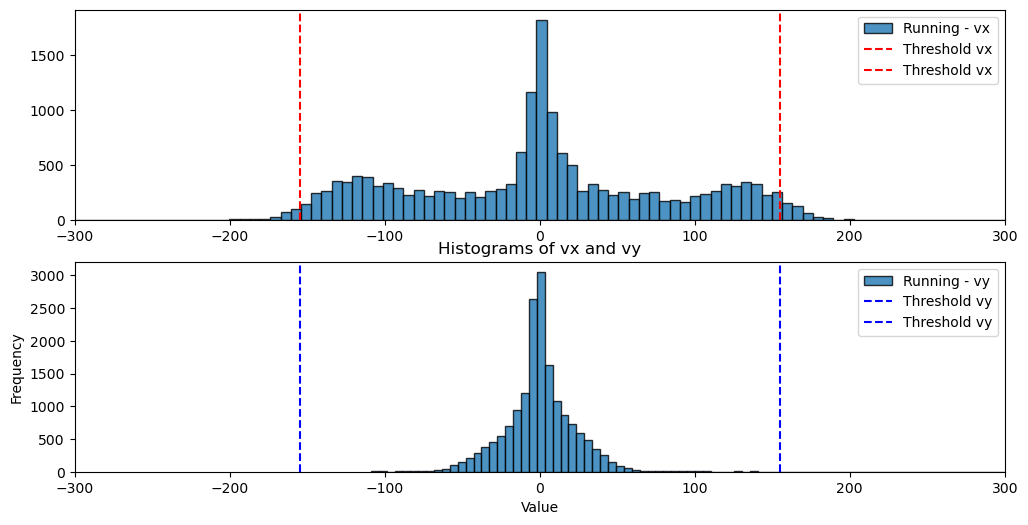

In [121]:
import matplotlib.pyplot as plt
import numpy as np

def plot_hist(activ_data_list, labels):
    threshold = 155
    all_vx = np.array([])
    all_vy = np.array([])
    plt.figure(figsize=(12, 6))

    for i, activ_data in enumerate(activ_data_list):
        x = activ_data[:, 2]
        y = activ_data[:, 3]
        vx = np.diff(x)
        vy = np.diff(y)

        # Plot "vx" histogram
        plt.subplot(2, 1, 1)
        plt.hist(vx, bins=200, edgecolor='black', alpha=0.8, label=f'{labels[i]} - vx')
        count_within_threshold = np.sum((np.abs(vx) >= -threshold) & (np.abs(vx) <= threshold))
        print(f"Accuracy (vx) - {labels[i]}: {count_within_threshold/len(vx)}")
        all_vx = np.concatenate((all_vx, vx))
        
        plt.subplot(2, 1, 2)
        # Plot "vy" histogram
        plt.hist(vy, bins=200, edgecolor='black', alpha=0.8, label=f'{labels[i]} - vy')
        count_within_threshold = np.sum((np.abs(vy) >= -threshold) & (np.abs(vy) <= threshold))
        print(f"Accuracy (vy) - {labels[i]}: {count_within_threshold/len(vy)}")
        all_vy = np.concatenate((all_vy, vy))
        
    plt.subplot(2, 1, 1)
    plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold vx')
    plt.axvline(x=-threshold, color='red', linestyle='--', label='Threshold vx')
    plt.xlim(-300, 300)
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.axvline(x=threshold, color='blue', linestyle='--', label='Threshold vy')
    plt.axvline(x=-threshold, color='blue', linestyle='--', label='Threshold vy')
    plt.xlim(-300, 300)
    plt.legend()

    plt.title('Histograms of vx and vy')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    total_vx_accuracy = np.sum((np.abs(all_vx) >= -threshold) & (np.abs(all_vx) <= threshold)) / len(all_vx)
    total_vy_accuracy = np.sum((np.abs(all_vy) >= -threshold) & (np.abs(all_vy) <= threshold)) / len(all_vy)
    print(f"Total Accuracy (vx): {total_vx_accuracy}")
    print(f"Total Accuracy (vy): {total_vy_accuracy}")
    plt.show()



datas = []
activ_list = [4]
# activ_list = [0,1,2,3,4]
for IDX in activ_list:
    prefix = parent_dir + sub_dir[IDX] + '/'
    label = LABEL[IDX]
    data = traverse_plot(prefix,label)
    datas.append(data)
    # print(f'{label} data shape: {data.shape}')
plot_hist(datas,["Running"])
# plot_hist(datas,["Sitting","Stretching","Jumping","Walking","Running"])

  

data shape: (7572, 5)
data shape: (7021, 5)
data shape: (7062, 5)
data shape: (3529, 5)
data shape: (7028, 5)
data shape: 5


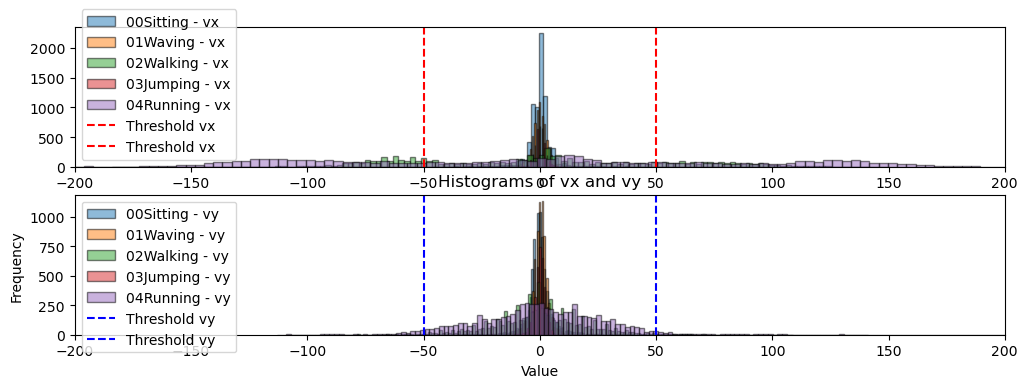

In [85]:
datas = []
for IDX in range(5):
    prefix = parent_dir + sub_dir[IDX] + '/'
    label = LABEL[IDX]
    data = traverse_plot(prefix,label)
    datas.append(data)
print(f'data shape: {len(datas)}')

plot_hist(datas, sub_dir)
